In [1]:
#Hyperparameter tuning using only reconstruction loss for all hyperparameters other than number of hidden layers and dropout
#rate
from tensorflow.keras import Sequential
from keras.layers import *
from keras.losses import MeanSquaredLogarithmicError
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.constraints import MaxNorm
import random
from tensorflow.keras.callbacks import EarlyStopping

#read train data
data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)
print(X.shape)

#scale train data
scaler = MinMaxScaler()
scaler.fit(X)
data = scaler.transform(X)

#define range of hyperparameter values for each hyperparameter
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint2 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint3 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint4 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint5 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint6 = [1.0, 2.0, 3.0, 4.0, 5.0]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
change_neurons = [-3,-2,-1,0,1,2,3]
init_mode = ['he_normal', 'he_uniform']

#choose a random combination of hyperparameter values 20 times
recon_loss_list = []
hyperparameter_sets = []
count=0
while count<20:
    wc = random.choice(weight_constraint)
    wc2 = random.choice(weight_constraint2)
    wc3 = random.choice(weight_constraint3)
    wc4 = random.choice(weight_constraint4)
    wc5 = random.choice(weight_constraint5)
    wc6 = random.choice(weight_constraint6)
    batch_s = random.choice(batch_size)
    ep = random.choice(epochs)
    im = random.choice(init_mode)
    cn = []
    for i in range(6):
        cn.append(random.choice(change_neurons))
    
    #Check if hyperparameter set was used before with this number of dense layers
    hyperparameter_set = [wc,wc2,wc3,wc4,wc5,wc6,batch_s,ep,im,cn]
    
    count_set = hyperparameter_sets.count(hyperparameter_set)
    print(count_set)
    
    if count_set > 0:
        
        continue
        
    else:
        
        hyperparameter_sets.append(hyperparameter_set)
    
    recon_loss = 0
    
    #for the current combination of hyperparameter values selected, run the Autoencoder 3 times and average the results
    for j in range(3):
        
        callback = tf.keras.callbacks.EarlyStopping(monitor='binary_crossentropy', patience=3)
        
        #Autoencoder
        encoder = Sequential()
        encoder.add(Input(shape=(25,)))
        encoder.add(Dense(16+cn[0],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc)))
        encoder.add(Dropout(0.1))
        encoder.add(Dense(11+cn[1],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc2)))
        encoder.add(Dropout(0.1)) 
        encoder.add(Dense(4+cn[2],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc3)))

        decoder = Sequential()
        decoder.add(Dense(6+cn[3],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc4)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(11+cn[4],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc5)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(16+cn[5],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc6)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(25,activation='sigmoid'))

        autoencoder = Sequential([encoder,decoder])
        autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.losses.BinaryCrossentropy()]) #FILL IN BRACKETS
        autoencoder.fit(data,data, batch_size=batch_s, epochs=ep, verbose=0, callbacks=[callback])

        #predict on train data and calculate and store reconstruction loss value in recon_loss_list
        pred_data_norm = autoencoder.predict(data)
        reconstruction_error_norm_AUTO = tf.keras.losses.BinaryCrossentropy()
        recon_loss += reconstruction_error_norm_AUTO(pred_data_norm,data).numpy()
    
    #average reconstruction loss
    recon_loss = recon_loss/3
    
    print("+1")
    recon_loss_list.append(recon_loss)
    count+=1

#select the lowest recon value and the hyperparameter set that provided this value
lowest_recon = min(recon_loss_list)
lowest_recon_hyperparameter_set = hyperparameter_sets[recon_loss_list.index(lowest_recon)]

print(len(recon_loss_list))
print("Lowest reconstruction loss: ")
print(lowest_recon)
print("Lowest reconstruction loss hyperparameter set: ")
print(lowest_recon_hyperparameter_set)

(10027, 25)
0
314/314 [==============================] - 0s 991us/step
+1
0
314/314 [==============================] - 0s 998us/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 967us/step
+1
0
314/314 [==============================] - 0s 983us/step
+1
0
314/314 [==============================] - 1s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 983us/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 983us/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 983us/step
+1
0
314/314 [==============================] - 0s 995us/step
+1
0
314/314 [=

(10027, 25)
0
76/76 [==============================] - 0s 1ms/step
0.5191630150502339
+1
0
76/76 [==============================] - 0s 1ms/step
0.7500416438748303
+1
0
76/76 [==============================] - 0s 1ms/step
0.526646677799946
+1
0
76/76 [==============================] - 0s 1ms/step
0.6204205562748907
+1
0
76/76 [==============================] - 0s 1ms/step
0.6039901129620193
+1
0
76/76 [==============================] - 0s 1ms/step
0.6866898806132905
+1
0
76/76 [==============================] - 0s 1ms/step
0.45479940860331375
+1
0
76/76 [==============================] - 0s 1ms/step
0.5588455134450466
+1
0
76/76 [==============================] - 0s 1ms/step
0.48181125976242273
+1
0
76/76 [==============================] - 0s 1ms/step
0.4382965077248809
+1
[[[[0.03850931677018633, 1.0], [0.043478260869565216, 1.0], [0.03354037267080745, 0.7252747252747253], [0.14492753623188406, 0.6923076923076923], [0.6153209109730848, 0.5054945054945055], [0.8633540372670807, 0.472527

Accuracy & Recall by threshold:
[[0.03768115942028986, 1.0], [0.043064182194616975, 1.0], [0.03354037267080745, 0.7252747252747253], [0.033126293995859216, 0.7142857142857143], [0.4525879917184265, 0.5494505494505495], [0.8397515527950311, 0.4725274725274725], [0.8790890269151139, 0.4725274725274725], [0.9006211180124224, 0.38461538461538464], [0.9494824016563147, 0.38461538461538464], [0.965631469979296, 0.38461538461538464]]


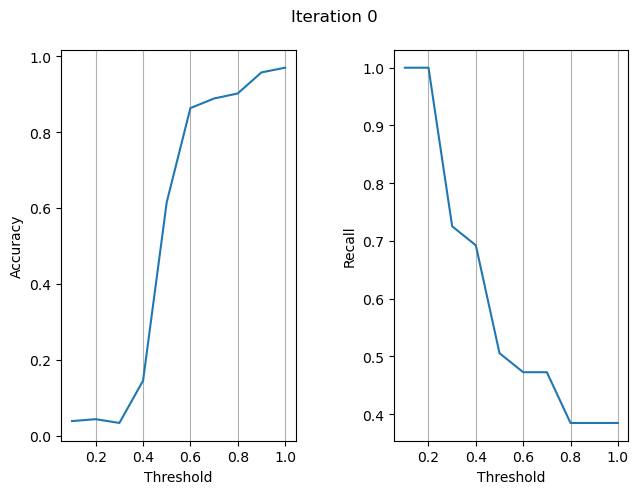

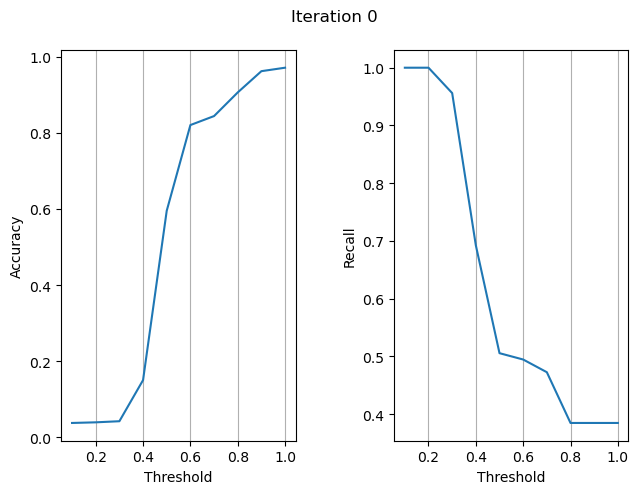

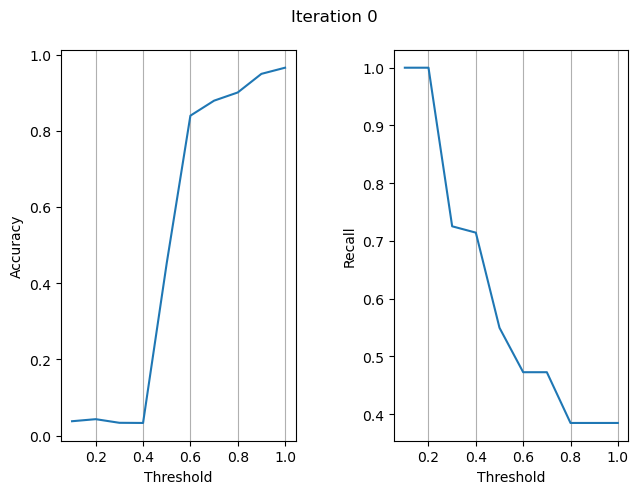

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.2902691511387164, 0.9230769230769231], [0.7755693581780538, 0.7912087912087912], [0.8857142857142857, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28612836438923395, 0.9230769230769231], [0.7681159420289855, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28778467908902694, 0.9230769230769231], [0.770600414078675, 0.7912087912087912], [0.8848861283643892, 0.7692307692307693], [0.8910973084886128, 0.

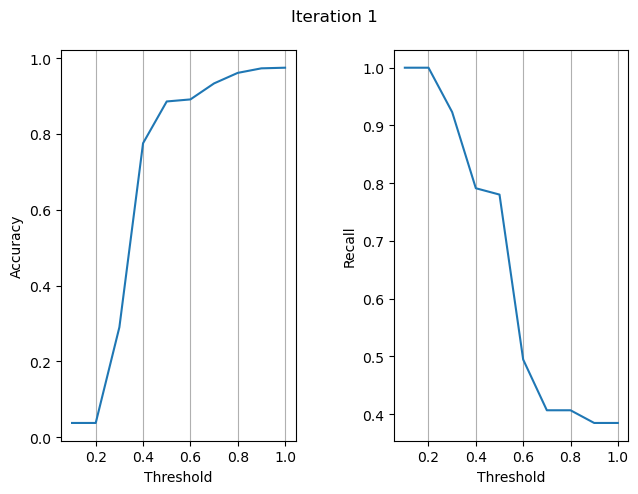

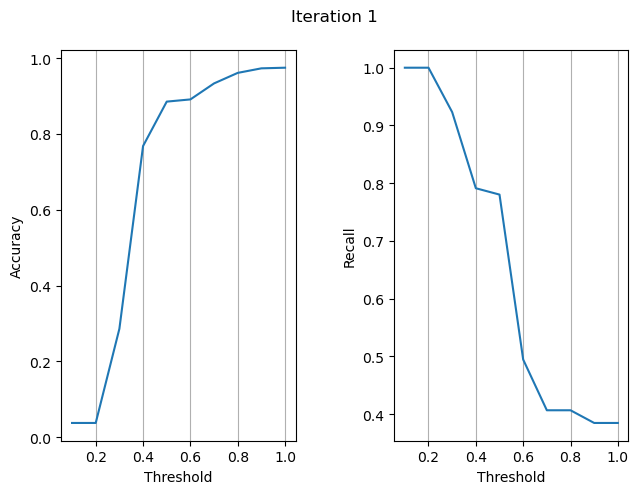

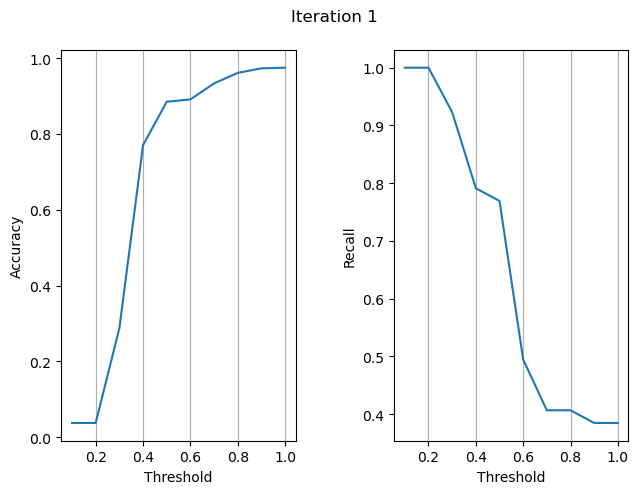

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.38716356107660455, 0.8241758241758241], [0.7209109730848862, 0.5384615384615384], [0.8592132505175983, 0.4945054945054945], [0.8881987577639752, 0.42857142857142855], [0.9039337474120083, 0.38461538461538464], [0.9507246376811594, 0.38461538461538464], [0.9730848861283644, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.04057971014492753, 1.0], [0.039337474120082816, 0.8791208791208791], [0.033126293995859216, 0.7142857142857143], [0.46873706004140786, 0.5384615384615384], [0.8244306418219461, 0.5054945054945055], [0.8799171842650103, 0.4725274725274725], [0.8964803312629399, 0.3956043956043956], [0.9333333333333333, 0.38461538461538464], [0.9643892339544513, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.043064182194616975, 1.0], [0.03768115942028986, 0.8351648351648352], [0.033126293995859216, 0.7142857142857143], [0.4616977225672878, 0.5384615384615384], [0.8227743271221533, 0.505

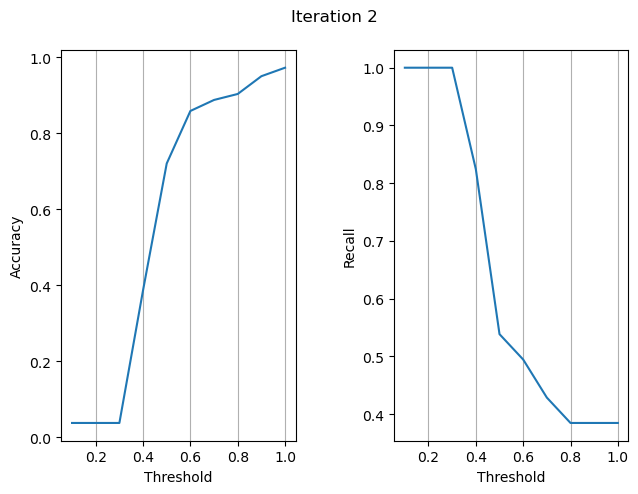

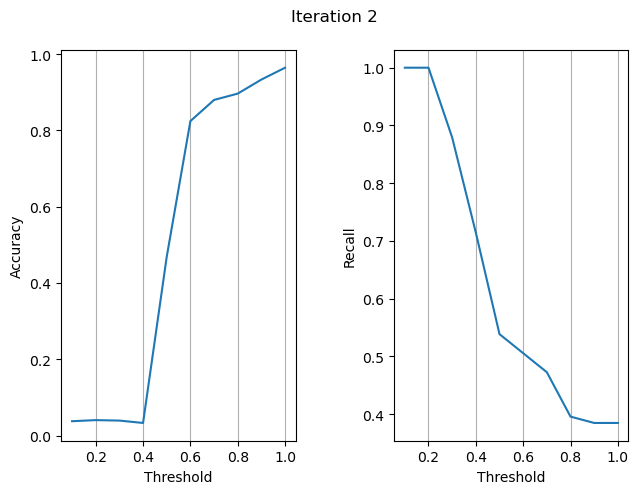

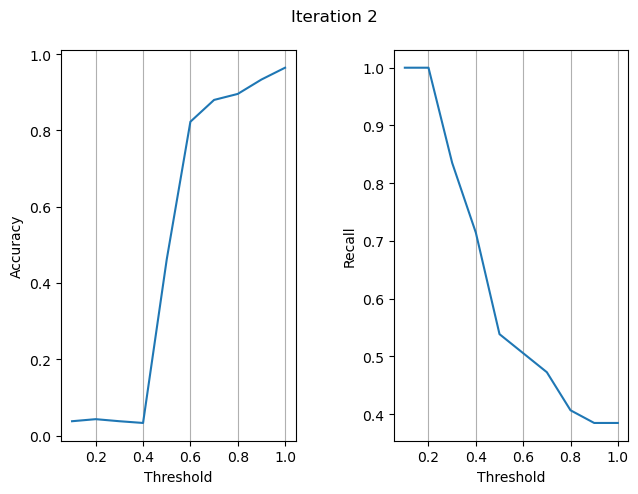

[[[0.039337474120082816, 1.0], [0.03768115942028986, 0.8571428571428571], [0.033126293995859216, 0.7142857142857143], [0.033126293995859216, 0.7142857142857143], [0.4463768115942029, 0.5494505494505495], [0.8380952380952381, 0.4725274725274725], [0.8803312629399586, 0.4725274725274725], [0.8973084886128364, 0.3956043956043956], [0.94824016563147, 0.38461538461538464], [0.965631469979296, 0.38461538461538464]], [[0.038923395445134575, 1.0], [0.039337474120082816, 0.9010989010989011], [0.033126293995859216, 0.7142857142857143], [0.033126293995859216, 0.7142857142857143], [0.4774327122153209, 0.5384615384615384], [0.8525879917184265, 0.4725274725274725], [0.8799171842650103, 0.4725274725274725], [0.9002070393374741, 0.3956043956043956], [0.94824016563147, 0.38461538461538464], [0.9652173913043478, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.26956521739130435, 0.9230769230769231], [0.7316770186335404, 0.7912087912087912], [0.8890269151138717, 0.780219

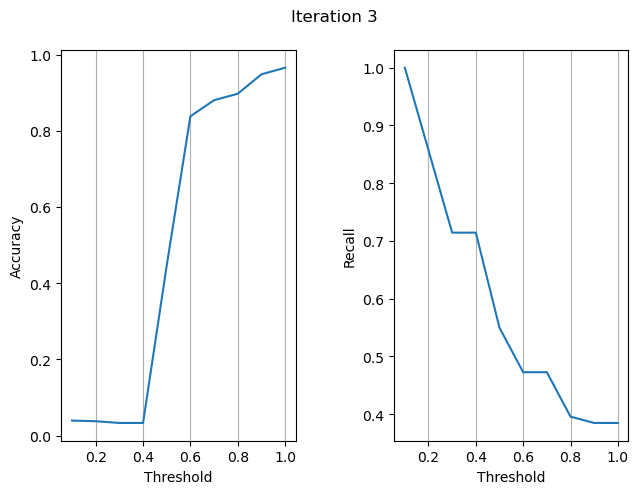

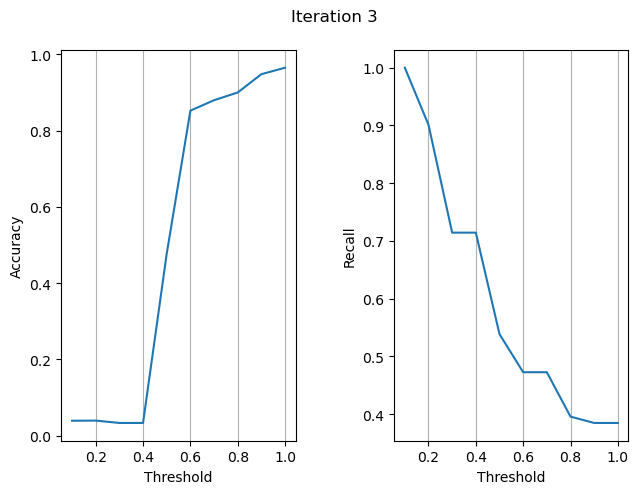

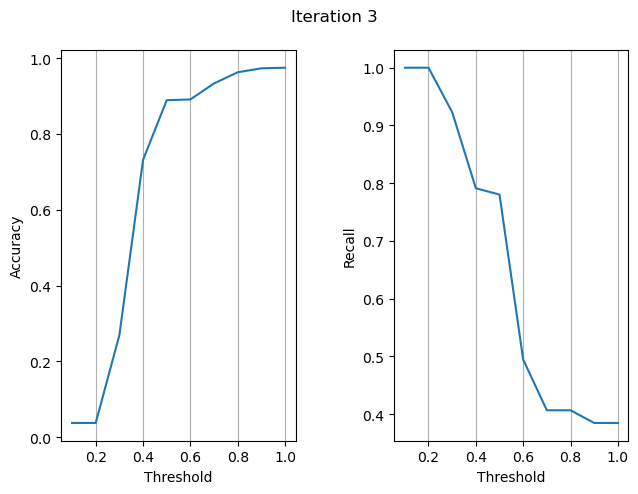

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.047619047619047616, 0.967032967032967], [0.4443064182194617, 0.7912087912087912], [0.7652173913043478, 0.7912087912087912], [0.8641821946169772, 0.5164835164835165], [0.894824016563147, 0.4065934065934066], [0.9043478260869565, 0.4065934065934066], [0.9540372670807453, 0.38461538461538464], [0.9706004140786749, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.0380952380952381, 1.0], [0.4608695652173913, 0.8241758241758241], [0.798343685300207, 0.6483516483516484], [0.8757763975155279, 0.4945054945054945], [0.8956521739130435, 0.4065934065934066], [0.9341614906832298, 0.4065934065934066], [0.9643892339544513, 0.38461538461538464], [0.9730848861283644, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.0380952380952381, 1.0], [0.05548654244306418, 0.978021978021978], [0.5946169772256729, 0.8131868131868132], [0.867080745341615, 0.5054945054945055], [0.89151138716

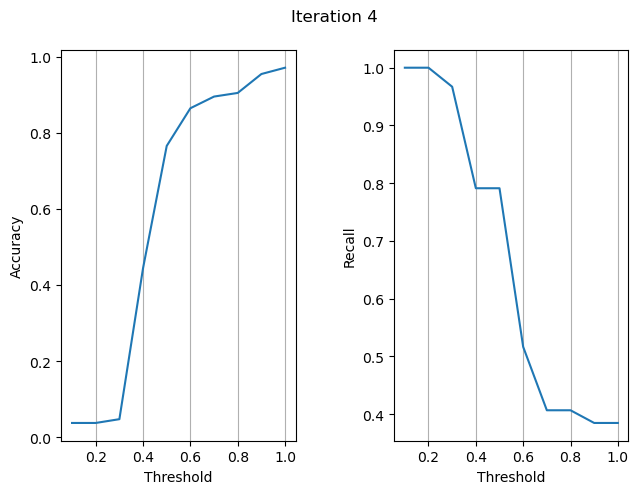

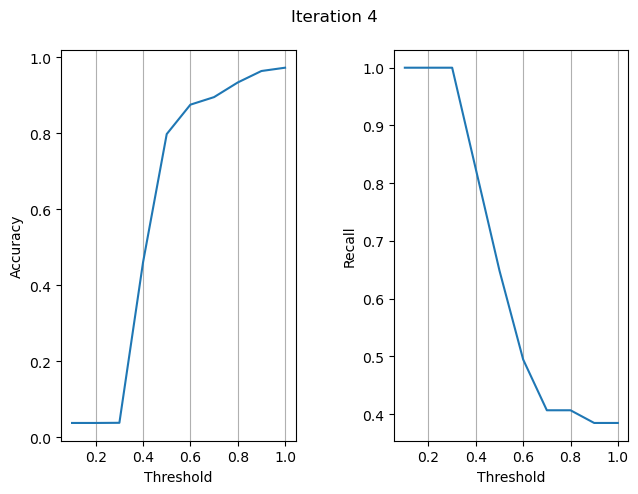

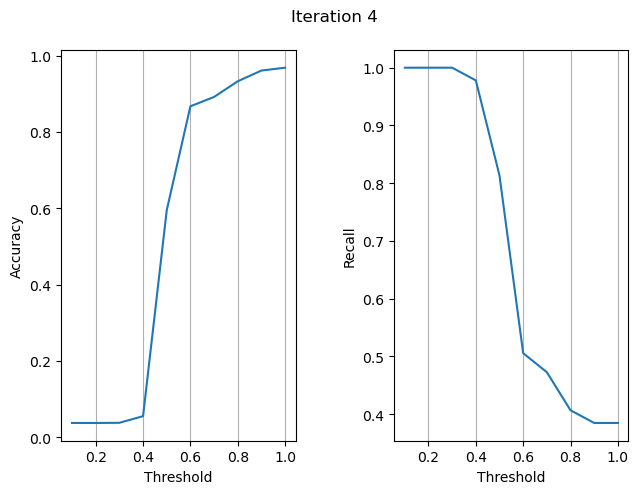

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.0380952380952381, 1.0], [0.506832298136646, 0.8241758241758241], [0.8645962732919255, 0.7692307692307693], [0.8869565217391304, 0.4945054945054945], [0.8985507246376812, 0.4065934065934066], [0.94824016563147, 0.4065934065934066], [0.9648033126293996, 0.38461538461538464], [0.9730848861283644, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.0380952380952381, 1.0], [0.0380952380952381, 1.0], [0.44389233954451346, 0.8241758241758241], [0.8219461697722568, 0.7472527472527473], [0.8753623188405797, 0.4945054945054945], [0.893167701863354, 0.4175824175824176], [0.9337474120082816, 0.4065934065934066], [0.9639751552795031, 0.38461538461538464], [0.9730848861283644, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.284472049689441, 0.9230769230769231], [0.7643892339544514, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.93333333333333

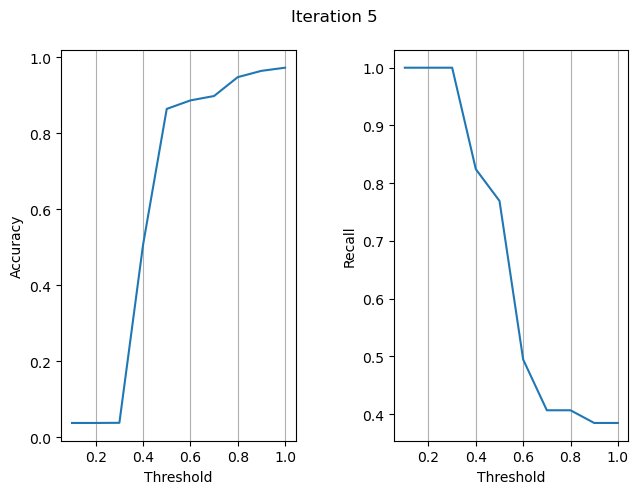

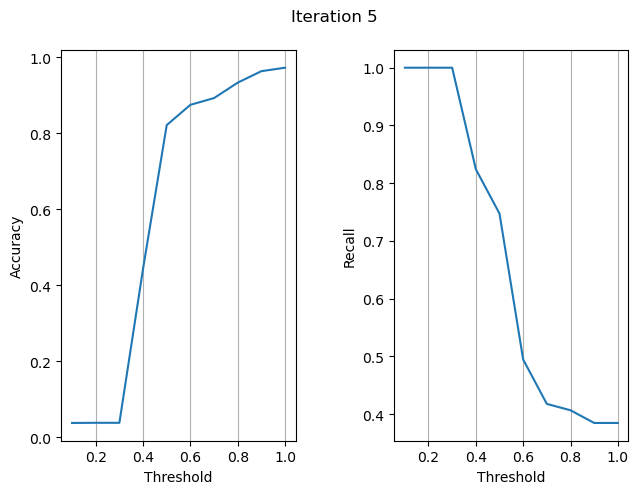

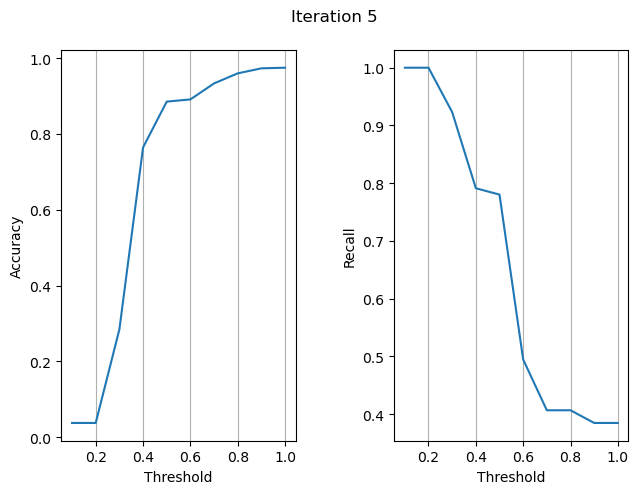

[[[0.03768115942028986, 1.0], [0.043064182194616975, 1.0], [0.20579710144927535, 0.9120879120879121], [0.5391304347826087, 0.5054945054945055], [0.6749482401656315, 0.5054945054945055], [0.7440993788819876, 0.3956043956043956], [0.8492753623188406, 0.3956043956043956], [0.8977225672877847, 0.38461538461538464], [0.9014492753623189, 0.38461538461538464], [0.9490683229813665, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.14658385093167703, 0.989010989010989], [0.530848861283644, 0.5384615384615384], [0.8621118012422361, 0.4945054945054945], [0.9457556935817806, 0.4945054945054945], [0.9631469979296067, 0.38461538461538464], [0.9668737060041408, 0.38461538461538464], [0.9714285714285714, 0.38461538461538464], [0.9763975155279503, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.043064182194616975, 1.0], [0.13250517598343686, 0.8131868131868132], [0.41076604554865426, 0.5384615384615384], [0.579296066252588, 0.5384615384615384], [0.741614906832298

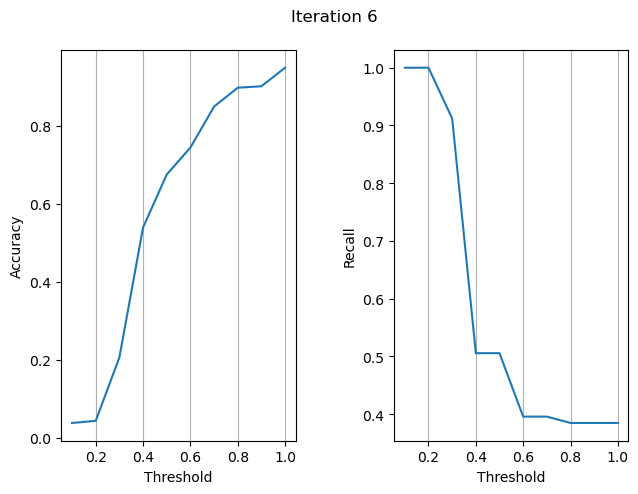

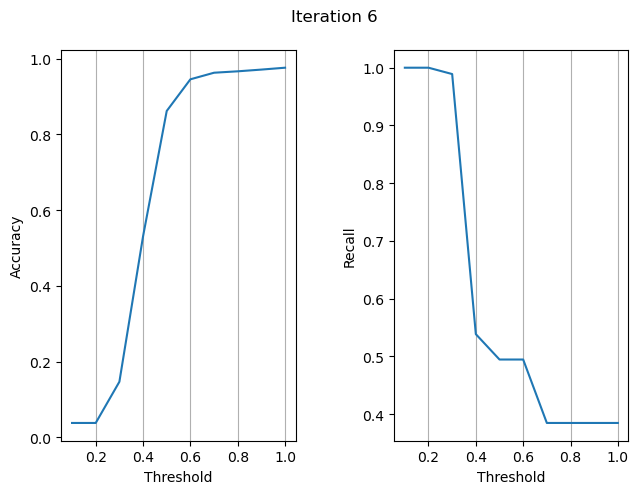

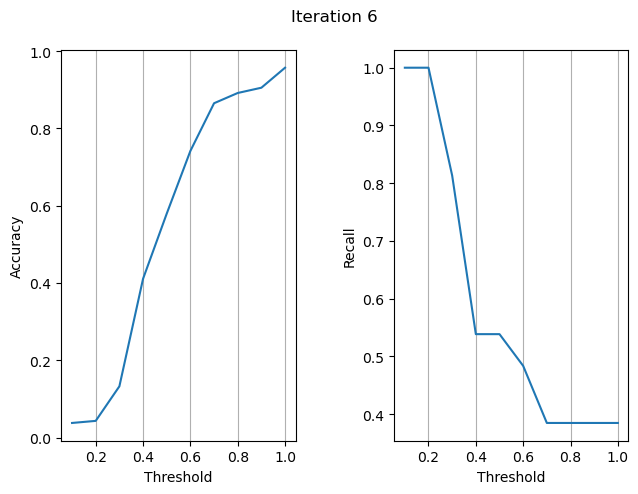

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.04679089026915114, 0.967032967032967], [0.4405797101449275, 0.7912087912087912], [0.7523809523809524, 0.6483516483516484], [0.8633540372670807, 0.4945054945054945], [0.891511387163561, 0.4065934065934066], [0.9039337474120083, 0.4065934065934066], [0.9569358178053831, 0.38461538461538464], [0.9726708074534162, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.03850931677018633, 0.989010989010989], [0.41366459627329194, 0.8131868131868132], [0.7606625258799172, 0.7252747252747253], [0.8633540372670807, 0.4945054945054945], [0.893167701863354, 0.4065934065934066], [0.9043478260869565, 0.4065934065934066], [0.9527950310559006, 0.38461538461538464], [0.9718426501035197, 0.38461538461538464]], [[0.043064182194616975, 1.0], [0.038923395445134575, 0.8791208791208791], [0.03643892339544513, 0.8021978021978022], [0.06128364389233954, 0.7142857142857143], [0.591304347826087, 0.5054945054945055], [0.8596

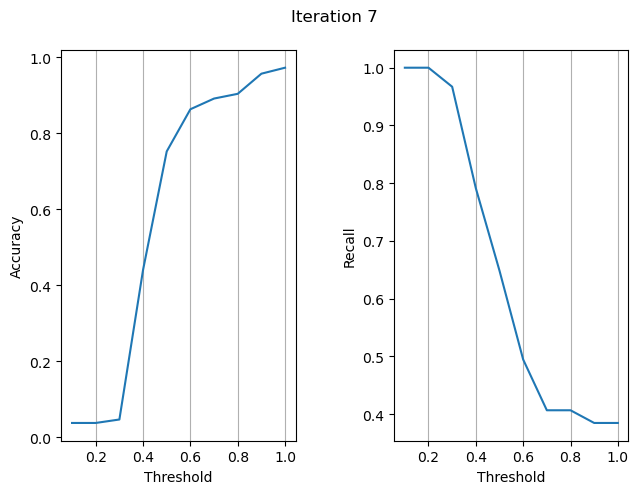

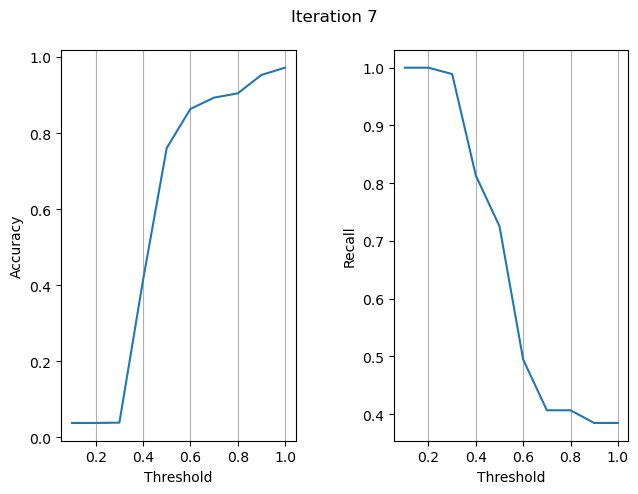

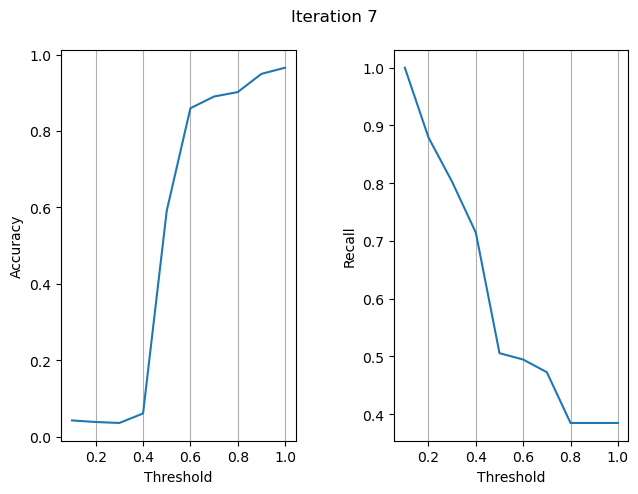

[[[0.03561076604554866, 0.9120879120879121], [0.0380952380952381, 0.8681318681318682], [0.037267080745341616, 0.8241758241758241], [0.033126293995859216, 0.7142857142857143], [0.46956521739130436, 0.5384615384615384], [0.8285714285714286, 0.4835164835164835], [0.8799171842650103, 0.4725274725274725], [0.8993788819875776, 0.3956043956043956], [0.9383022774327122, 0.38461538461538464], [0.965631469979296, 0.38461538461538464]], [[0.038923395445134575, 1.0], [0.037267080745341616, 0.8461538461538461], [0.033126293995859216, 0.7142857142857143], [0.033126293995859216, 0.7142857142857143], [0.474120082815735, 0.5384615384615384], [0.84472049689441, 0.4725274725274725], [0.8819875776397516, 0.4725274725274725], [0.901863354037267, 0.38461538461538464], [0.9457556935817806, 0.38461538461538464], [0.965631469979296, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03850931677018633, 0.8791208791208791], [0.03768115942028986, 0.8351648351648352], [0.033126293995859216, 0.7142857142857143]

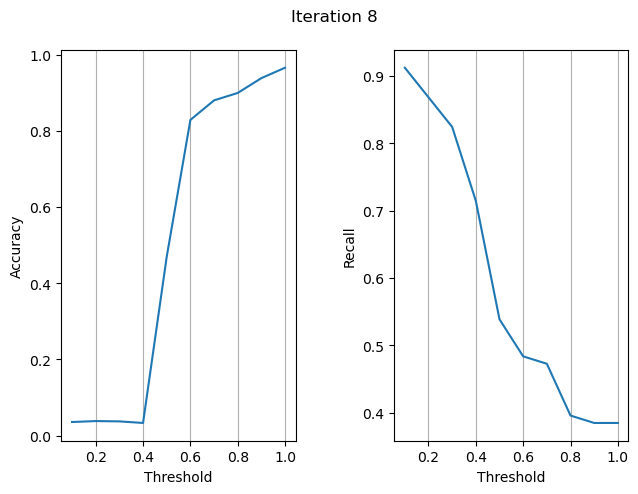

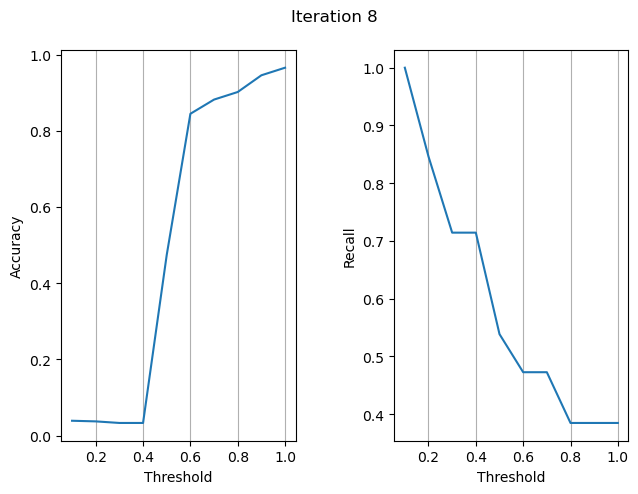

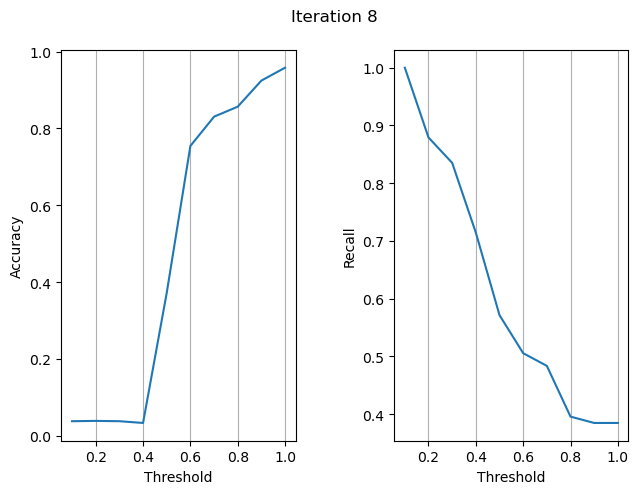

[[[0.0380952380952381, 1.0], [0.03850931677018633, 0.8791208791208791], [0.037267080745341616, 0.8241758241758241], [0.033126293995859216, 0.7142857142857143], [0.2699792960662526, 0.6373626373626373], [0.7101449275362319, 0.4835164835164835], [0.8724637681159421, 0.4725274725274725], [0.8877846790890269, 0.4725274725274725], [0.924223602484472, 0.38461538461538464], [0.9585921325051759, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.0380952380952381, 0.8681318681318682], [0.10890269151138716, 0.8131868131868132], [0.5863354037267081, 0.5384615384615384], [0.8521739130434782, 0.4945054945054945], [0.8857142857142857, 0.3956043956043956], [0.9366459627329192, 0.38461538461538464], [0.9610766045548654, 0.38461538461538464], [0.968944099378882, 0.38461538461538464], [0.9714285714285714, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.043064182194616975, 1.0], [0.03561076604554866, 0.7802197802197802], [0.19296066252587993, 0.6373626373626373], [0.6459627329192547, 0.5054945

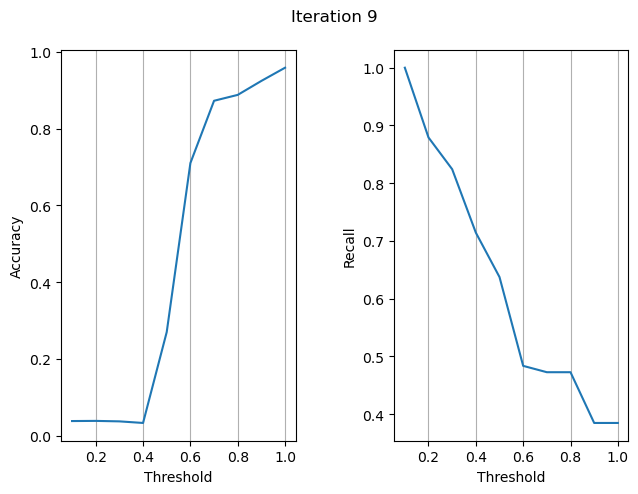

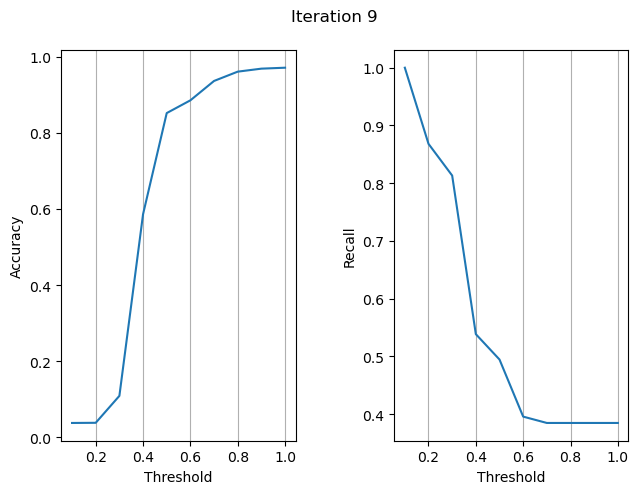

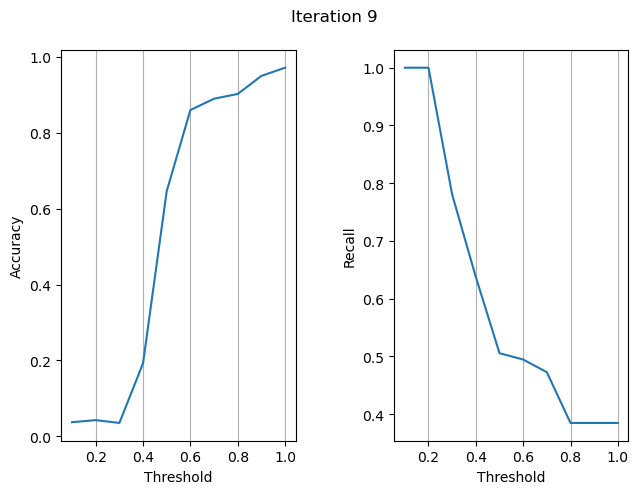

In [2]:
#Hyperparameter tuning using accuracy and recall for dropout rate
#Number of hidden layers is tuned by comparing reconstruction loss, accuracy and recall from all 4 python files for the
#different numbers of hidden layers
from tensorflow.keras import Sequential
from keras.layers import *
from keras.losses import MeanSquaredLogarithmicError
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.constraints import MaxNorm
import random
from sklearn.metrics import recall_score,accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#read train data
data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)
print(X.shape)

#scale train data
scaler = MinMaxScaler()
scaler.fit(X)
data = scaler.transform(X)

#read validation data
data_path_test = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_validation_data.xlsx'
df_hasanomalies = pd.read_excel(data_path_test,sheet_name='Validation')
X_test = df_hasanomalies.drop(['target'], axis=1)

#scale validation data
data_test = scaler.transform(X_test)

#define range of dropout rate values for each dropout layer
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate3 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate4 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

#choose a random combination of dropout rate values 10 times
accuracy_recall_list = []
dropout_rate_sets = []
count=0
while count<10:
    dr = random.choice(dropout_rate)
    dr1 = random.choice(dropout_rate1)
    dr2 = random.choice(dropout_rate2)
    dr3 = random.choice(dropout_rate3)
    dr4 = random.choice(dropout_rate4)
    
    #Check if hyperparameter set was used before with this number of dense layers
    dropout_rate_set = [dr,dr1,dr2,dr3,dr4]
    
    count_set = dropout_rate_sets.count(dropout_rate_set)
    print(count_set)
    
    if count_set > 0:
        
        continue
        
    else:
        
        dropout_rate_sets.append(dropout_rate_set)
    
    #for the current combination of dropout rate values selected, run the Autoencoder 3 times
    recon_loss_avg = 0
    three_accuracy_recall = []
    for j in range(3):

        callback = tf.keras.callbacks.EarlyStopping(monitor='binary_crossentropy', patience=3)
        
        encoder = Sequential()
        encoder.add(Input(shape=(25,)))
        encoder.add(Dense(16-2,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(3)))
        encoder.add(Dropout(dr))
        encoder.add(Dense(11+1,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(2)))
        encoder.add(Dropout(dr1)) 
        encoder.add(Dense(4+3,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(2)))

        decoder = Sequential()
        decoder.add(Dense(6+0,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(2)))
        decoder.add(Dropout(dr2))
        decoder.add(Dense(11-2,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(3)))
        decoder.add(Dropout(dr3))
        decoder.add(Dense(16+3,activation='relu',kernel_initializer='he_uniform', kernel_constraint=MaxNorm(3)))
        decoder.add(Dropout(dr4))
        decoder.add(Dense(25,activation='sigmoid'))

        autoencoder = Sequential([encoder,decoder])
        autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.losses.BinaryCrossentropy()]) #FILL IN BRACKETS
        autoencoder.fit(data,data, batch_size=20, epochs=50, verbose=0, callbacks=[callback])
        
        pred_data_norm = autoencoder.predict(data)
        reconstruction_error_norm_AUTO = tf.keras.losses.BinaryCrossentropy()
        recon_loss = reconstruction_error_norm_AUTO(pred_data_norm,data).numpy()
        recon_loss_avg += recon_loss

        pred_data_test = autoencoder.predict(data_test)
        reconstruction_error_test = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
        reconstruction_error_test = reconstruction_error_test(pred_data_test,data_test)

        accuracy_recall = []

        #store a separate list for accuracy and recall and place into a main accuracy_recall list for 10 threshold value
        #starting from training data recon loss + 0.1 incrementing by 0.1 each time
        for j in range(1,11,1):
            threshold = recon_loss + (0.1*j)
            pred_test = tf.math.less(reconstruction_error_test, threshold)
            pred_test = [1 if i==False else 0 for i in pred_test]

            accuracy = accuracy_score(df_hasanomalies['target'], pred_test)
            recall = recall_score(df_hasanomalies['target'], pred_test)

            accuracy_recall.append([accuracy,recall])
        
        #store accuracy_recall list in another list which will be stored in a main list
        three_accuracy_recall.append(accuracy_recall)

    #average training reconstruction loss
    recon_loss_avg = recon_loss_avg/3
    print(recon_loss_avg)
    print("+1")
    #store accuracy and recall results for this dropout rate combination in main list accuracy_recall_list for comparing results
    #between different dropout rate combinations
    accuracy_recall_list.append(three_accuracy_recall)
    count+=1

print(accuracy_recall_list)
print(dropout_rate_sets)

#for each of the 10 dropout rate combination selected, plot the accuracy and recall graphs for the 3 times the Autoencoder
#was run
iter_num=0
for elm in accuracy_recall_list:
    print(elm)
    x = [x/10 for x in list(range(1,11,1))]
    y = elm
    print("dropout rate set:")
    print(dropout_rate_sets[iter_num])
    for i in range(len(y)):
        figure, axis = plt.subplots(1, 2)
        figure.suptitle("Iteration "+str(iter_num))
        figure.tight_layout(w_pad=4.0)
        axis[0].plot(x,[pt[0] for pt in y[i]])
        axis[0].grid(axis = 'x')
        axis[0].set(xlabel="Threshold",ylabel="Accuracy")
        axis[1].plot(x,[pt[1] for pt in y[i]])
        axis[1].grid(axis = 'x')
        axis[1].set(xlabel="Threshold",ylabel="Recall")
        print('Accuracy & Recall by threshold:')
        print(y[i])
    plt.show()
    iter_num+=1
